In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def load_data() -> pd.DataFrame:
    return pd.read_csv(Path('./datasets/depression/Student Depression Dataset.csv'))

In [3]:
df = load_data()
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.describe().round(3)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27898.000,27901.000
mean,70442.149,25.822,3.141,0.000,7.656,2.944,0.001,7.157,3.140,0.585
std,40641.175,4.906,1.381,0.044,1.471,1.361,0.044,3.708,1.437,0.493
min,2.000,18.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,35039.000,21.000,2.000,0.000,6.290,2.000,0.000,4.000,2.000,0.000
50%,70684.000,25.000,3.000,0.000,7.770,3.000,0.000,8.000,3.000,1.000
75%,105818.000,30.000,4.000,0.000,8.920,4.000,0.000,10.000,4.000,1.000
max,140699.000,59.000,5.000,5.000,10.000,5.000,4.000,12.000,5.000,1.000


In [5]:
df.describe(include='object').round(3)

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


In [6]:
df['Depression'].value_counts(normalize=True).round(3).to_frame()

,proportion
Depression,
1,0.585
0,0.415


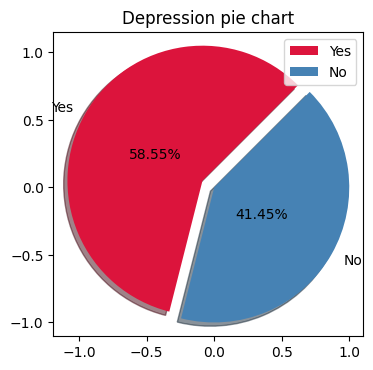

In [7]:
plt.figure(figsize=(4, 4))
plt.pie(
    x = df['Depression'].value_counts(),
    labels = ['Yes', 'No'],
    colors=['crimson', 'steelblue'],
    autopct = '%0.2f%%',
    startangle=45,
    shadow=True,
    explode=[0.1, 0],
    frame=True,
    pctdistance=0.4
)
plt.title('Depression pie chart')
plt.legend()
plt.show()

In [8]:
df.dtypes.to_frame().reset_index().rename(columns={'index': 'features', 0:'data_types'})

,features,data_types
0,id,int64
1,Gender,object
2,Age,float64
3,City,object
4,Profession,object
5,Academic Pressure,float64
6,Work Pressure,float64
7,CGPA,float64
8,Study Satisfaction,float64
9,Job Satisfaction,float64


In [9]:
df.drop(['id', 'Job Satisfaction', 'Work Pressure'], axis = 1, inplace=True)
df.shape

(27901, 15)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
null_col = df.isna().sum() / df.shape[0] * 100
null_col[null_col > 0].to_frame().rename(columns= {0: 'null_percentages'})

,null_percentages
Financial Stress,0.010752


In [12]:
print(df.shape)
df.dropna(inplace=True)
df.shape

(27901, 15)


(27898, 15)

In [13]:
df.columns = df.columns.str.title()
df.columns = df.columns.str.replace(' ', '_')
df.rename(columns= {
    'Have_You_Ever_Had_Suicidal_Thoughts_?': 'Suicidal_Thoughts',
    'Family_History_Of_Mental_Illness': 'Family_Mental_History',
    'Work/Study_Hours': 'WrkStdy_Hours'}, inplace=True)
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic_Pressure', 'Cgpa',
       'Study_Satisfaction', 'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Suicidal_Thoughts', 'WrkStdy_Hours', 'Financial_Stress',
       'Family_Mental_History', 'Depression'],
      dtype='object')

In [14]:
convert_columns = ['Age', 'Academic_Pressure',\
                   'Study_Satisfaction', 'WrkStdy_Hours', 'Financial_Stress']

for i in convert_columns:
    df[i] = df[i].astype('int64')

df.dtypes.to_frame()

,0
Gender,object
Age,int64
City,object
Profession,object
Academic_Pressure,int64
Cgpa,float64
Study_Satisfaction,int64
Sleep_Duration,object
Dietary_Habits,object
Degree,object


In [15]:
filtered_city = df[df['City'].map(df['City'].value_counts()) <= 2]
df.drop(index=filtered_city.index, inplace=True)
df.shape

(27872, 15)

In [16]:
df = df.query('Study_Satisfaction != 0').reset_index(drop=True)
df.shape

(27862, 15)

In [17]:
df = df.query('Academic_Pressure != 0').reset_index(drop=True)
df.shape

(27860, 15)

In [18]:
df = df.query('Profession == "Student"').reset_index(drop=True)
df.shape

(27829, 15)

In [19]:
df = df.query('Cgpa != 0').reset_index(drop=True)
df.shape

(27827, 15)

In [20]:
df = df.query('Sleep_Duration != "Others"').reset_index(drop=True)
df.shape

(27809, 15)

In [21]:
df = df.query('Dietary_Habits != "Others"').reset_index(drop=True)
df.shape

(27797, 15)

In [22]:
df = df.query("Degree != 'Others'").reset_index(drop = True)
df.shape

(27762, 15)

In [23]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

q1 = df[numeric_columns].quantile(0.25)
q3 = df[numeric_columns].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).sum().to_frame().reset_index().rename(columns={'index': 'features', 0: 'outliers'})

outliers

,features,outliers
0,Age,12
1,Academic_Pressure,0
2,Cgpa,0
3,Study_Satisfaction,0
4,WrkStdy_Hours,0
5,Financial_Stress,0
6,Depression,0


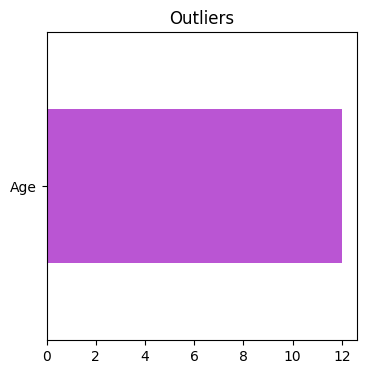

In [24]:
ax = outliers.iloc[:1,:].reset_index().drop('index', axis = 1).plot(kind = 'barh',title = 'Outliers',
color = 'mediumorchid',
legend = False, figsize=(4, 4))

ax.set_yticklabels(['Age'])
plt.show()

In [25]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - iqr*1.5
upper_bound = q3 + iqr * 1.5

median_age = df['Age'].mean()
df['Age'] = df['Age'].map(lambda age:median_age if age < lower_bound or age > upper_bound else  age)
df['Age'] = df['Age'].astype('int64')
df.dtypes.to_frame()


,0
Gender,object
Age,int64
City,object
Profession,object
Academic_Pressure,int64
Cgpa,float64
Study_Satisfaction,int64
Sleep_Duration,object
Dietary_Habits,object
Degree,object


In [26]:
from scipy.stats import zscore

In [27]:
df_zscore = df[numeric_columns].apply(zscore)
z_score_outliers = df[(df_zscore.abs() > 3).any(axis = 1)].reset_index().drop('index', axis = 1)
z_score_outliers

,Gender,Age,City,Profession,Academic_Pressure,Cgpa,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,WrkStdy_Hours,Financial_Stress,Family_Mental_History,Depression
0,Female,42,Rajkot,Student,2,9.03,5,More than 8 hours,Moderate,Class 12,Yes,3,1,Yes,0
1,Male,43,Rajkot,Student,5,5.64,2,5-6 hours,Moderate,B.Ed,No,9,4,Yes,1
2,Male,42,Kolkata,Student,5,6.10,1,Less than 5 hours,Healthy,MBBS,Yes,10,4,No,1
3,Female,43,Bhopal,Student,5,9.67,1,7-8 hours,Healthy,MSc,Yes,2,3,Yes,0
4,Female,42,Vasai-Virar,Student,5,9.56,2,5-6 hours,Moderate,PhD,No,4,2,Yes,0
5,Male,42,Ludhiana,Student,5,5.32,4,7-8 hours,Unhealthy,Class 12,No,12,5,Yes,1
6,Male,41,Patna,Student,3,5.85,1,5-6 hours,Moderate,Class 12,No,11,5,Yes,1


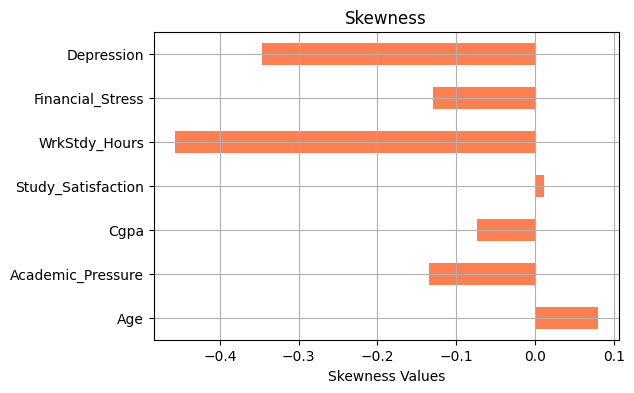

In [28]:
skewness = df[numeric_columns].skew().to_frame().reset_index().rename(columns = {'index': 'features', 0: 'skewness'})

ax = skewness.plot(kind = 'barh',
              title = 'Skewness',
              color = 'coral',
              figsize=(6, 4),
              legend = False)
ax.grid()
ax.set_yticklabels(numeric_columns)
ax.set_xlabel('Skewness Values')
plt.show()

## Exploratory Data Analysis

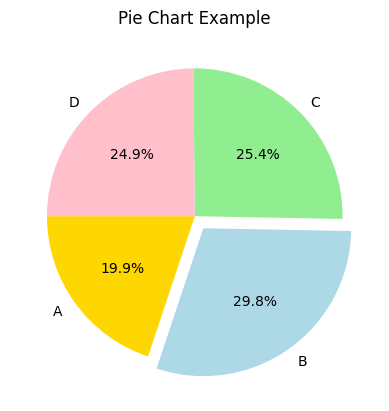

In [29]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['A', 'B', 'C', 'D']
sizes = [20, 30, 25.6, 25]  # Percentages or values
colors = ['gold', 'lightblue', 'lightgreen', 'pink']  # Optional
explode = [0, 0.1, 0, 0]  # Highlight the second slice

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=180)
plt.title('Pie Chart Example')  # Optional title
plt.show()


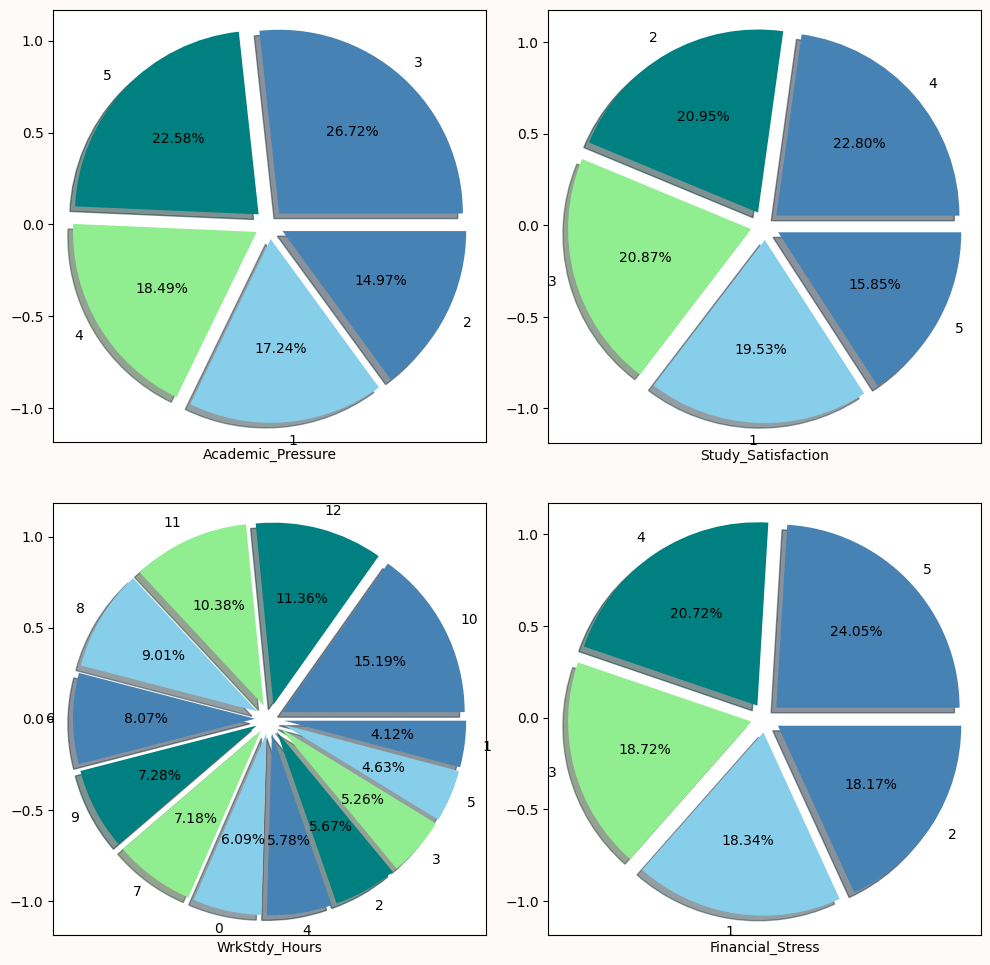

In [30]:
figure, axes = plt.subplots(2, 2, figsize = (10, 10), facecolor = 'snow')
axes = axes.flatten()
pie_cols = ['Academic_Pressure', 'Study_Satisfaction',
            'WrkStdy_Hours', 'Financial_Stress']

for ax, i in zip(axes, pie_cols):
    value_counts = df[i].value_counts()
    explode = [0.08] * len(value_counts)
    ax.pie(value_counts, labels = value_counts.index, shadow=True, autopct="%1.2f%%", frame=True, explode = explode, colors = ['steelblue', 'teal', 'lightgreen', 'skyblue'])
    ax.set_xticks([])
    ax.set_xlabel(i)

plt.tight_layout()
plt.show()

In [31]:
import seaborn as sns

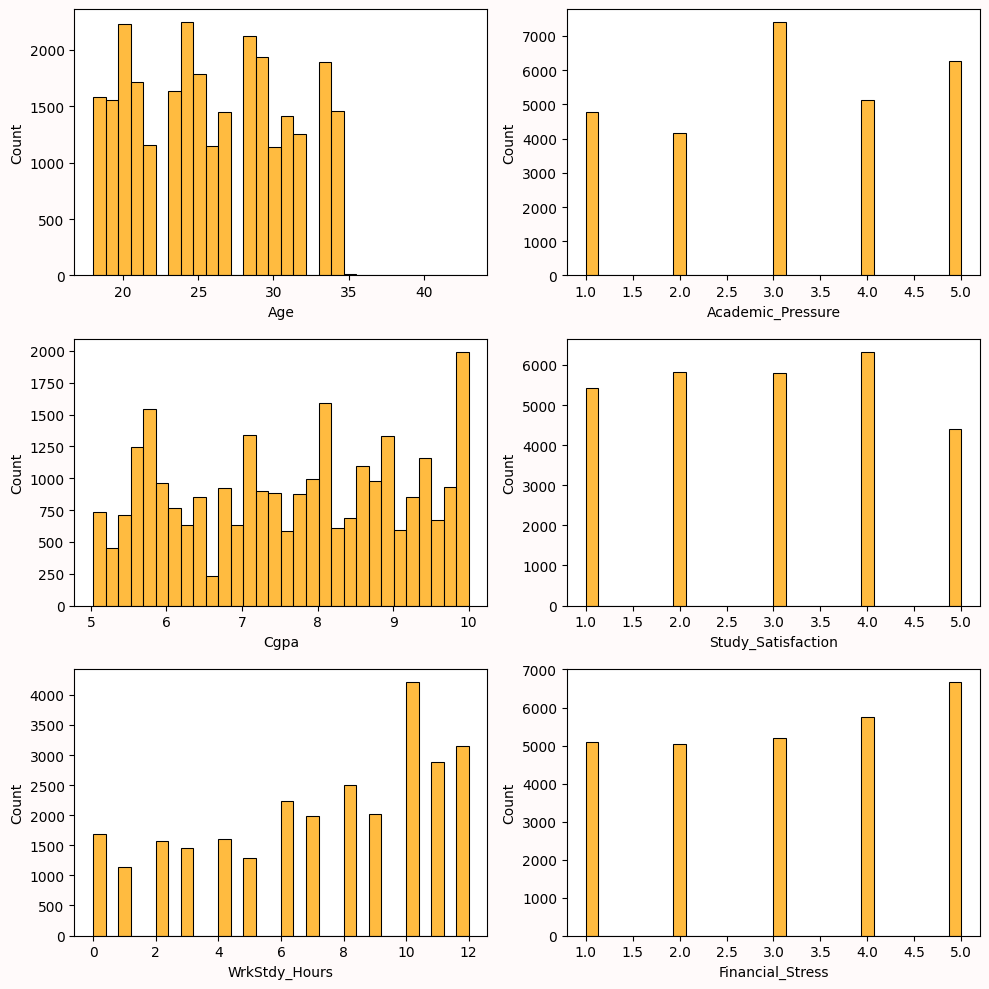

In [32]:
figure, axes = plt.subplots(3, 2, figsize = (10, 10), facecolor = 'snow')
axes = axes.flatten()

for ax, i in zip(axes, numeric_columns):
    sns.histplot(
        df[i], ax = ax, bins= 30, edgecolor = 'black', color='orange',
    )

plt.tight_layout()
plt.show()

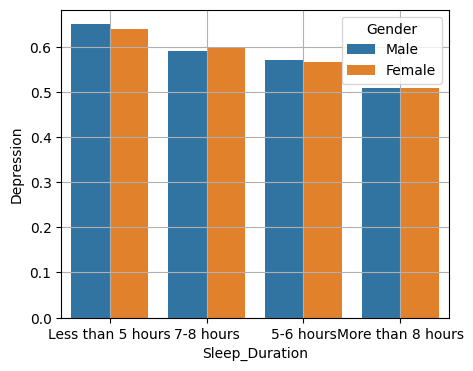

In [33]:
filtered_data = df.groupby(['Gender','Sleep_Duration'])['Depression'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(5, 4))
filtered_data
sns.barplot(filtered_data, x = 'Sleep_Duration', y = 'Depression', hue = 'Gender')
plt.grid()


<Axes: xlabel='Gender', ylabel='Depression'>

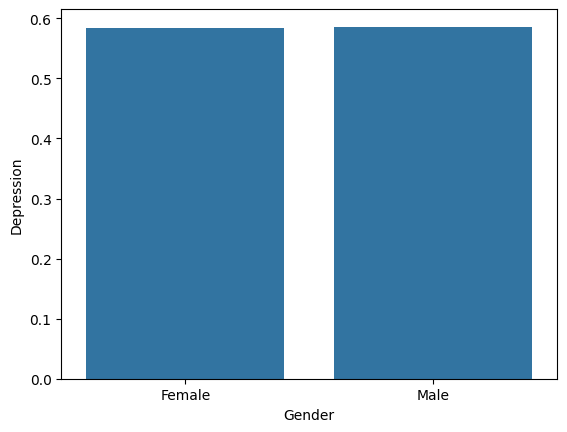

In [34]:
filtered_data = df.groupby('Gender')['Depression'].mean().reset_index()
sns.barplot(filtered_data, x = 'Gender', y = 'Depression')

<Axes: xlabel='Age', ylabel='Depression'>

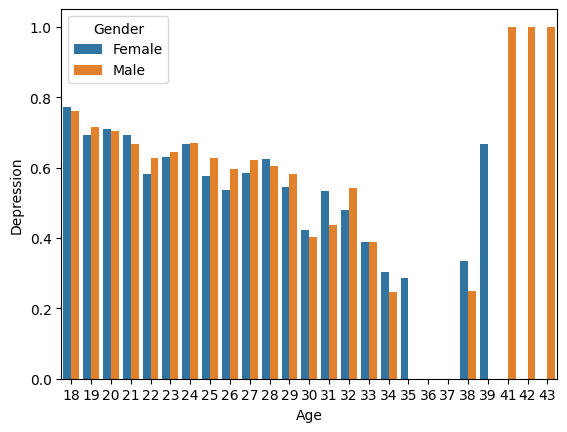

In [35]:
filtered_data = df.groupby(['Age', 'Gender'])['Depression'].mean().reset_index()
sns.barplot(
    filtered_data, x = 'Age', y = 'Depression', hue = 'Gender'
)

<Axes: xlabel='Dietary_Habits', ylabel='Depression'>

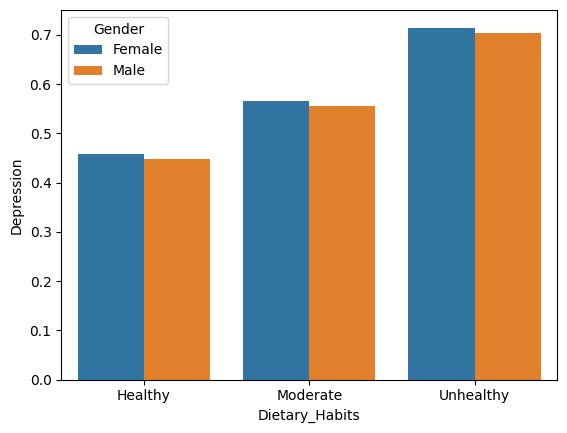

In [36]:
filtered_data = df.groupby(['Dietary_Habits', 'Gender'])['Depression'].mean().reset_index()
sns.barplot(filtered_data, x = 'Dietary_Habits', y = 'Depression', hue = 'Gender')

<Axes: xlabel='Depression', ylabel='Degree'>

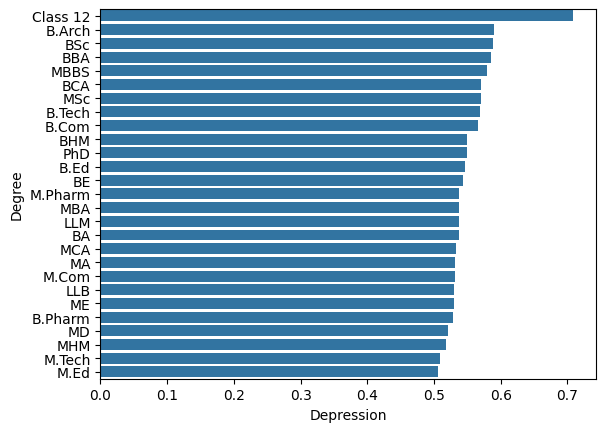

In [37]:
filtered_data = df.groupby(['Degree'])['Depression'].mean().sort_values(ascending=False).reset_index()
sns.barplot(filtered_data, x = 'Depression', y = 'Degree')


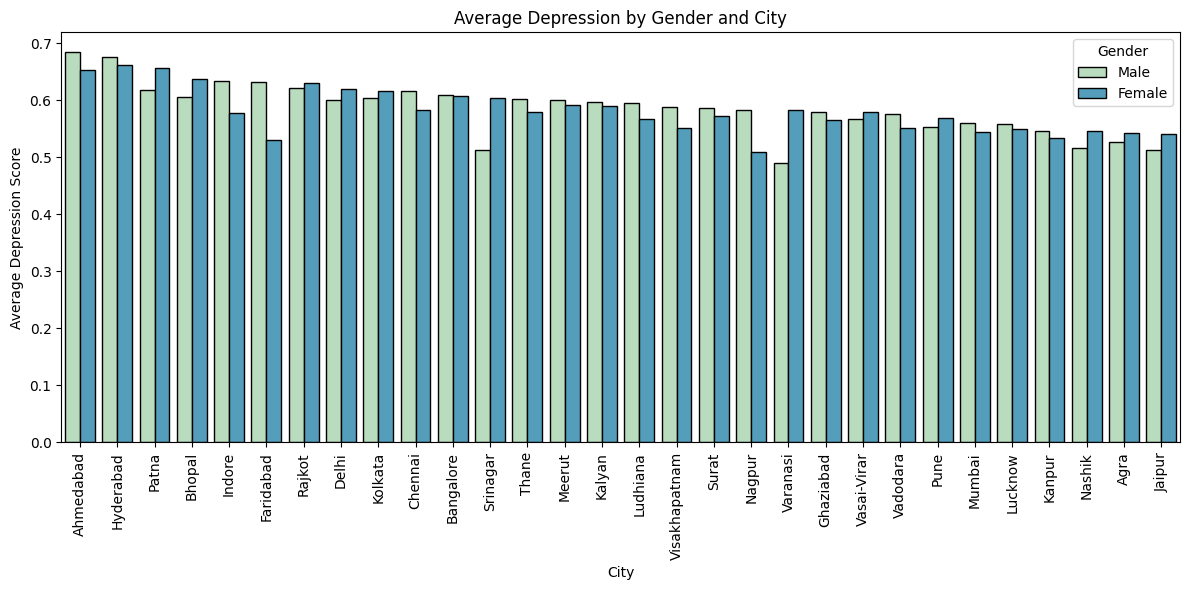

In [38]:
filtered_data = df.groupby(['Gender', 'City'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,\
            x = 'City',\
            y = 'Depression',\
            hue = 'Gender',\
            palette = 'GnBu',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Gender and City')
plt.ylabel('Average Depression Score')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

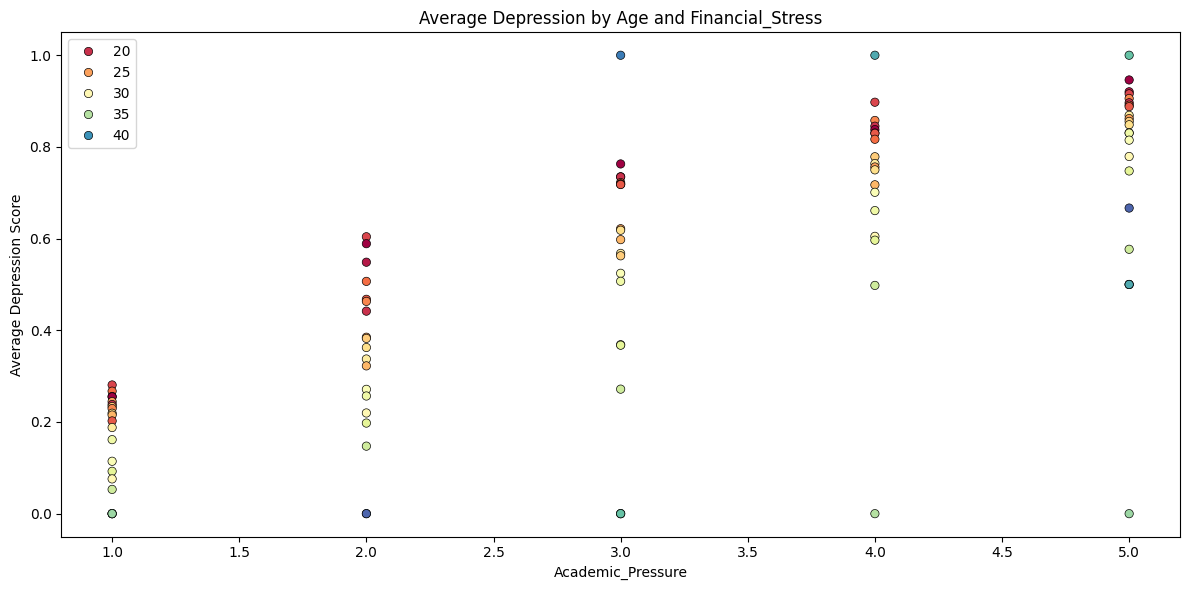

In [39]:
filtered_data = df.groupby(['Age', 'Academic_Pressure'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,\
            x = 'Academic_Pressure',\
            y = 'Depression',\
            hue = 'Age',\
            palette = 'Spectral',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Age and Financial_Stress')
plt.ylabel('Average Depression Score')
plt.xlabel('Academic_Pressure')
plt.tight_layout()
plt.legend()
plt.show()


<Axes: xlabel='Cgpa', ylabel='Depression'>

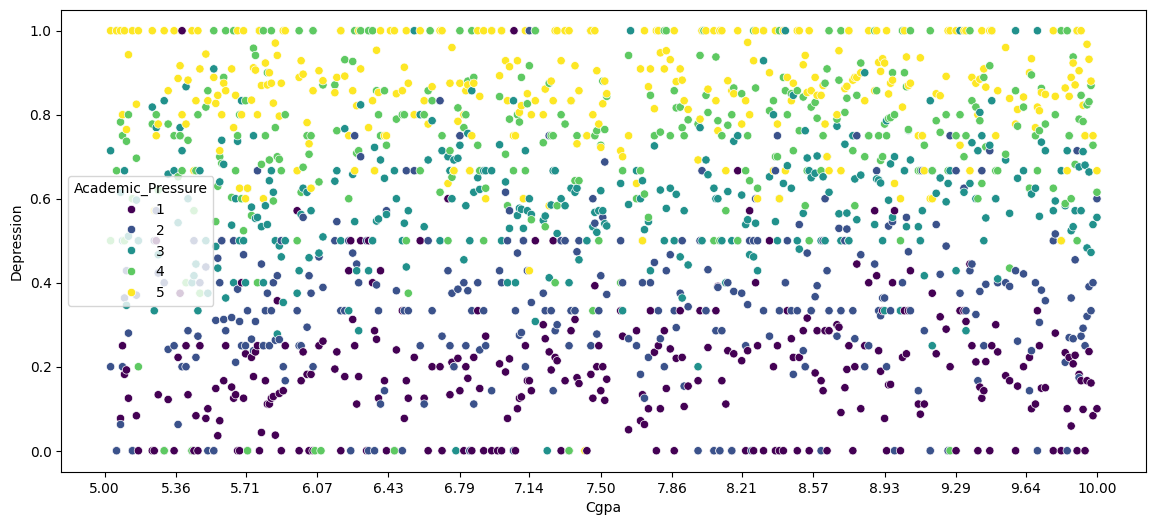

In [40]:
filtered_data = df.groupby(['Cgpa', 'Academic_Pressure'])['Depression'].mean().reset_index()
plt.figure(figsize=(14, 6))
plt.xticks(np.linspace(5, 10, 15).round(2))
sns.scatterplot(filtered_data, x = 'Cgpa', y = 'Depression', hue = 'Academic_Pressure', palette='viridis')

C:\Users\mvnag\AppData\Local\Temp\ipykernel_14128\879442230.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(filtered_data,\
C:\Users\mvnag\AppData\Local\Temp\ipykernel_14128\879442230.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


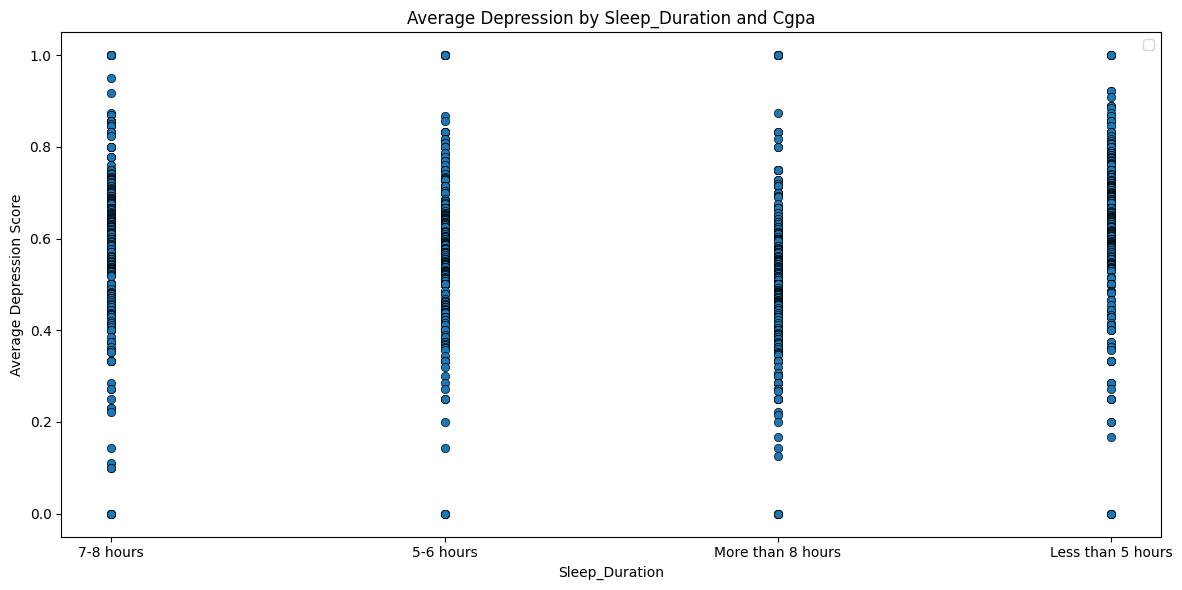

In [41]:
filtered_data = df.groupby(['Cgpa', 'Sleep_Duration'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,\
            x = 'Sleep_Duration',\
            y = 'Depression',\
            palette = 'Oranges',\
            edgecolor = 'black'
         )

plt.title('Average Depression by Sleep_Duration and Cgpa')
plt.ylabel('Average Depression Score')
plt.xlabel('Sleep_Duration')
plt.tight_layout()
plt.legend()
plt.show()

<Axes: xlabel='Sleep_Duration', ylabel='Depression'>

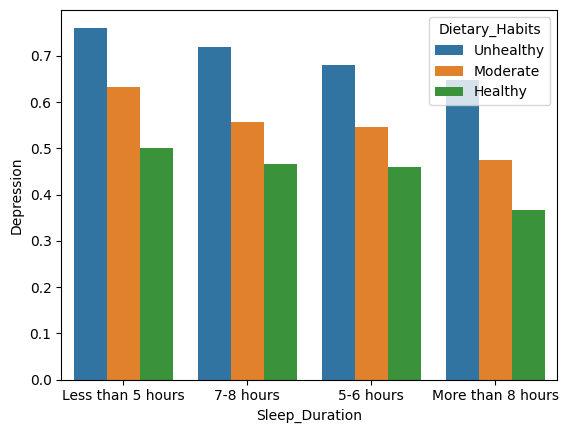

In [42]:
filtered_data = df.groupby(['Sleep_Duration', 'Dietary_Habits'])['Depression'].mean()\
.sort_values(ascending = False)\
.reset_index()

sns.barplot(
    filtered_data,
    x = 'Sleep_Duration', y = 'Depression', hue='Dietary_Habits'
)

<Axes: >

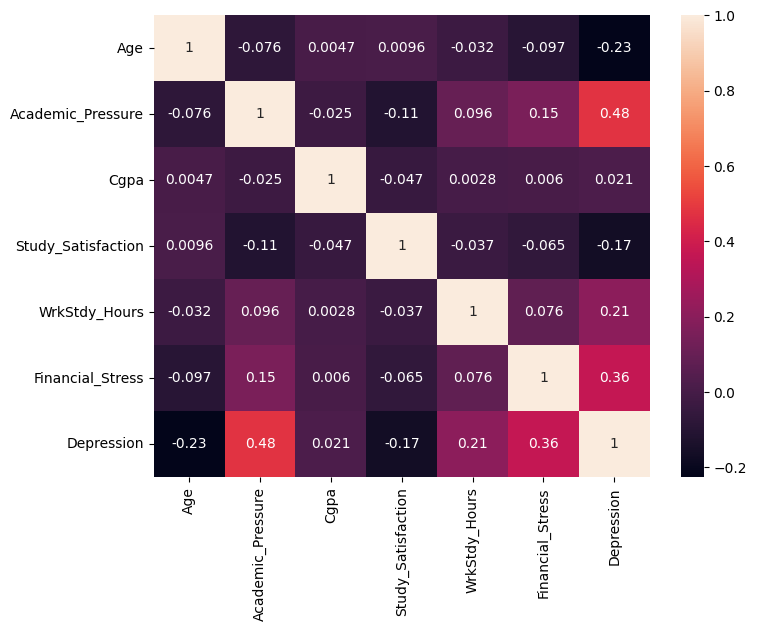

In [43]:
corr_mat = df[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True)

In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
cat_columns = ['Gender', 'Sleep_Duration', 'Dietary_Habits', 'Suicidal_Thoughts', 'Family_Mental_History']
for col in cat_columns:
    # Calculate depression proportion for each category
    category_order = df.groupby(col)['Depression'].mean().sort_values().index
    
    # Create a mapping based on the order
    category_mapping = {category: idx for idx, category in enumerate(category_order)}
    print(category_mapping)
    
    # Apply the mapping to the column
    df[col] = df[col].map(category_mapping)

df.head()

{'Female': 0, 'Male': 1}
{'More than 8 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'Less than 5 hours': 3}
{'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}


,Gender,Age,City,Profession,Academic_Pressure,Cgpa,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,WrkStdy_Hours,Financial_Stress,Family_Mental_History,Depression
0,1,33,Visakhapatnam,Student,5,8.97,2,1,0,B.Pharm,1,3,1,0,1
1,0,24,Bangalore,Student,2,5.90,5,1,1,BSc,0,3,2,1,0
2,1,31,Srinagar,Student,3,7.03,5,3,0,BA,0,9,1,1,0
3,0,28,Varanasi,Student,3,5.59,2,2,1,BCA,1,4,5,1,1
4,0,25,Jaipur,Student,4,8.13,3,1,1,M.Tech,1,1,1,0,0


In [46]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns].corr()['Depression'].sort_values(ascending=False)

Depression               1.000000
Suicidal_Thoughts        0.547045
Academic_Pressure        0.475135
Financial_Stress         0.363427
WrkStdy_Hours            0.209221
Dietary_Habits           0.207421
Sleep_Duration           0.098890
Family_Mental_History    0.053251
Cgpa                     0.020888
Gender                   0.001704
Study_Satisfaction      -0.168122
Age                     -0.226557
Name: Depression, dtype: float64

In [47]:
from imblearn.combine import SMOTEENN

In [48]:
proba_cols = ['Degree', 'City']

for proba_col in proba_cols:
    col_probas = df.groupby(proba_col)['Depression'].mean()
    df[f"{proba_col}_Proba"] = df[proba_col].map(lambda col : col_probas[col])

df.head()

,Gender,Age,City,Profession,Academic_Pressure,Cgpa,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_Thoughts,WrkStdy_Hours,Financial_Stress,Family_Mental_History,Depression,Degree_Proba,City_Proba
0,1,33,Visakhapatnam,Student,5,8.97,2,1,0,B.Pharm,1,3,1,0,1,0.528465,0.569358
1,0,24,Bangalore,Student,2,5.90,5,1,1,BSc,0,3,2,1,0,0.588901,0.607843
2,1,31,Srinagar,Student,3,7.03,5,3,0,BA,0,9,1,1,0,0.537037,0.556693
3,0,28,Varanasi,Student,3,5.59,2,2,1,BCA,1,4,5,1,1,0.570728,0.529326
4,0,25,Jaipur,Student,4,8.13,3,1,1,M.Tech,1,1,1,0,0,0.509323,0.524685


In [49]:
pred = df.drop(['Profession', 'Depression', 'City', 'Degree'], axis = 1)
res = df['Depression']

smote_enn = SMOTEENN(random_state = 42, n_jobs = -1)
X_smote, y_smote = smote_enn.fit_resample(pred, res)

print(f'Resampled dataset shape: {y_smote.value_counts(normalize = True)}')

Resampled dataset shape: Depression
0    0.525878
1    0.474122
Name: proportion, dtype: float64


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_ftrain, X_ftest, y_ftrain, y_ftest =  train_test_split(pred, res, test_size=0.2, random_state=42)
X_ftrain.shape, y_ftrain.shape

((22209, 13), (22209,))

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_ftrain, y_ftrain)

rnd_feat = pd.DataFrame({'Features': X_ftrain.columns, 'rnd_feat_importances': rnd_clf.feature_importances_}).sort_values(by = 'rnd_feat_importances', ascending=False).reset_index(drop=True)
rnd_feat

,Features,rnd_feat_importances
0,Suicidal_Thoughts,0.228087
1,Academic_Pressure,0.165377
2,Financial_Stress,0.092865
3,Cgpa,0.085947
4,Age,0.079651
5,City_Proba,0.071381
6,WrkStdy_Hours,0.070623
7,Degree_Proba,0.061921
8,Study_Satisfaction,0.042927
9,Dietary_Habits,0.035965


C:\Users\mvnag\AppData\Local\Temp\ipykernel_14128\150820118.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


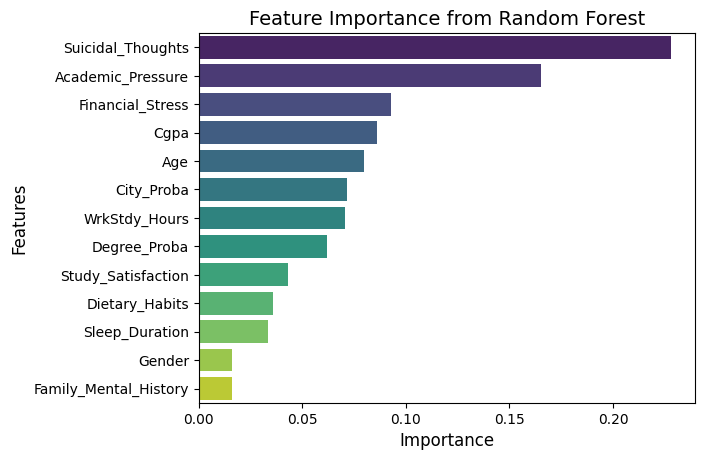

In [54]:
sns.barplot(
    x = 'rnd_feat_importances',
    y = 'Features',
    data=rnd_feat,
    palette='viridis'
)
plt.title("Feature Importance from Random Forest", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_ftrain, y_ftrain)

gb_feat = pd.DataFrame({'Features': X_ftrain.columns, 'gb_feat_importances': gb_clf.feature_importances_}).sort_values(by = 'gb_feat_importances', ascending=False).reset_index(drop=True)
gb_feat

,Features,gb_feat_importances
0,Suicidal_Thoughts,0.526420
1,Academic_Pressure,0.233734
2,Financial_Stress,0.112518
3,Age,0.045097
4,WrkStdy_Hours,0.027856
5,Dietary_Habits,0.026733
6,Study_Satisfaction,0.013126
7,Sleep_Duration,0.006300
8,City_Proba,0.003218
9,Cgpa,0.002607


C:\Users\mvnag\AppData\Local\Temp\ipykernel_14128\2052414729.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


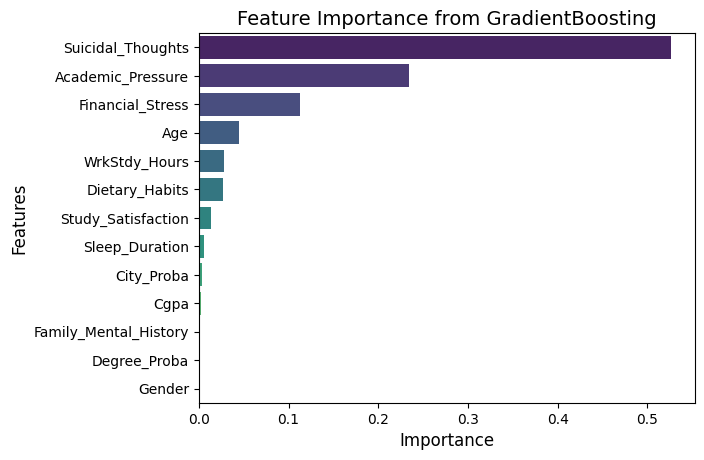

In [57]:
sns.barplot(
    x = 'gb_feat_importances',
    y = 'Features',
    data=gb_feat,
    palette='viridis'
)
plt.title("Feature Importance from GradientBoosting", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_ftrain, y_ftrain)

ada_feat = pd.DataFrame({'Features': X_ftrain.columns, 'ada_feat_importances': ada_clf.feature_importances_}).sort_values(by = 'ada_feat_importances', ascending=False).reset_index(drop=True)
ada_feat

c:\Users\mvnag\Desktop\ml\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Features,ada_feat_importances
0,Academic_Pressure,0.22
1,Age,0.20
2,Financial_Stress,0.16
3,WrkStdy_Hours,0.12
4,Cgpa,0.06
5,Dietary_Habits,0.06
6,Study_Satisfaction,0.06
7,City_Proba,0.04
8,Sleep_Duration,0.04
9,Family_Mental_History,0.02


C:\Users\mvnag\AppData\Local\Temp\ipykernel_14128\1257723200.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


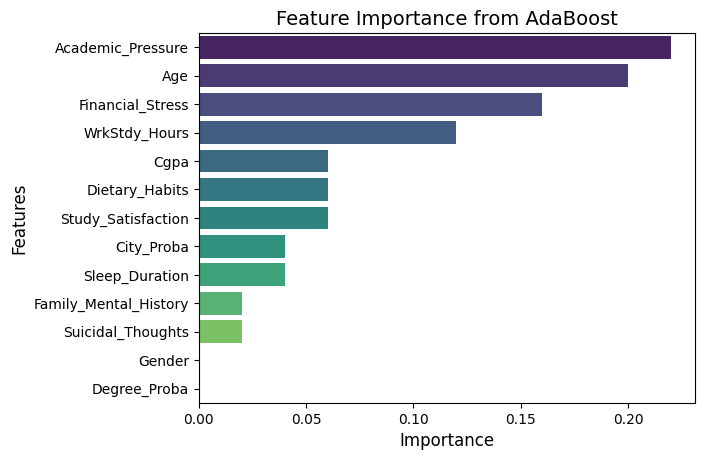

In [60]:
sns.barplot(
    x = 'ada_feat_importances',
    y = 'Features',
    data=ada_feat,
    palette='viridis'
)
plt.title("Feature Importance from AdaBoost", fontsize = 14)
plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Features", fontsize = 12)
plt.show()

In [61]:
# predictors = X_smote.drop(['Gender', 'Sleep_Duration', 'Family_Mental_History'], axis = 1)
# response = y_smote

# X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

# X_train.shape, X_test.shape


In [62]:
predictors = df.drop(['Gender', 'Sleep_Duration', 'Family_Mental_History', 'City', 'Profession', 'Degree'], axis = 1)
response = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((22209, 11), (5553, 11))

In [73]:
overlap = X_train.merge(X_test, how='inner')
overlap

,Age,Academic_Pressure,Cgpa,Study_Satisfaction,Dietary_Habits,Suicidal_Thoughts,WrkStdy_Hours,Financial_Stress,Depression,Degree_Proba,City_Proba


In [63]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [64]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    pipeline = make_pipeline(StandardScaler(), SVC(kernel=kernel))
    print(f"kernel: {kernel}\n score: {cross_val_score(pipeline, X_train, y_train, cv = 5, scoring='accuracy').mean()}")

kernel: linear
 score: 1.0
kernel: poly
 score: 1.0
kernel: rbf
 score: 1.0


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [66]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),\
          GradientBoostingClassifier(), XGBClassifier()]

models 1:- LogisticRegression
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training Precision: 1.0
Testing Precision: 1.0
Training F1score: 1.0
Testing F1score: 1.0
Cross Validation Mean:  1.0



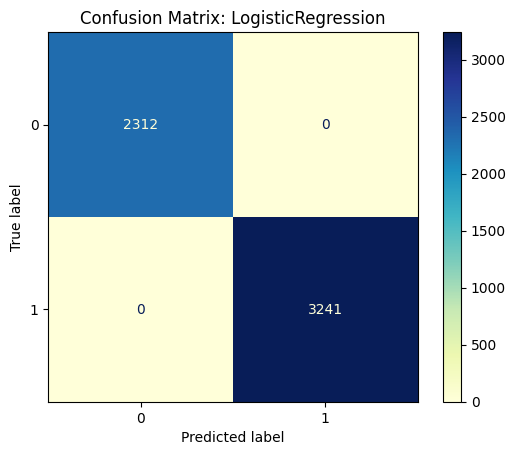

------------------------------------------------------------
models 2:- DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training Precision: 1.0
Testing Precision: 1.0
Training F1score: 1.0
Testing F1score: 1.0
Cross Validation Mean:  1.0



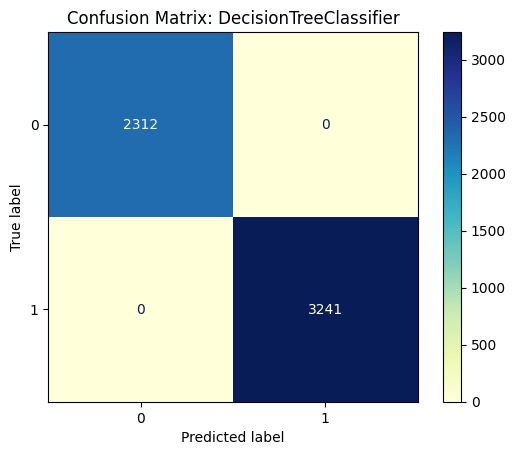

------------------------------------------------------------
models 3:- RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training Precision: 1.0
Testing Precision: 1.0
Training F1score: 1.0
Testing F1score: 1.0
Cross Validation Mean:  1.0



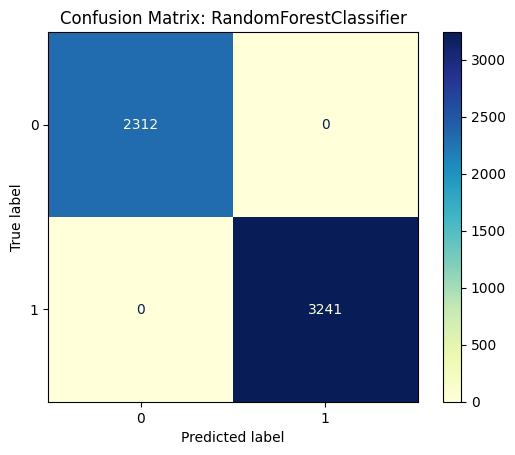

------------------------------------------------------------
models 4:- AdaBoostClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training Precision: 1.0
Testing Precision: 1.0
Training F1score: 1.0
Testing F1score: 1.0
Cross Validation Mean:  1.0



c:\Users\mvnag\Desktop\ml\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


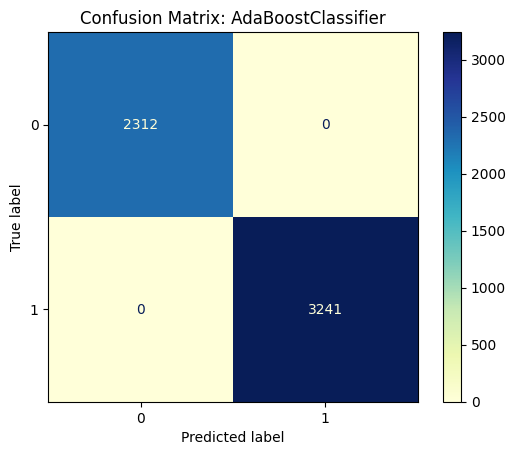

------------------------------------------------------------
models 5:- GradientBoostingClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training Precision: 1.0
Testing Precision: 1.0
Training F1score: 1.0
Testing F1score: 1.0
Cross Validation Mean:  1.0



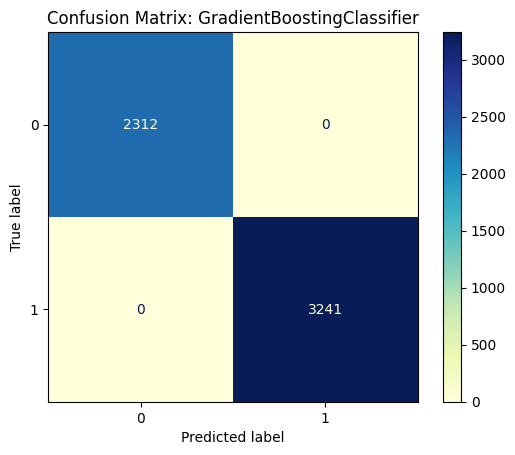

------------------------------------------------------------
models 6:- XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Recall: 1.0
Testing Recall: 1.0
Training Precision: 1.0
Testing Precision: 1.0
Training F1score: 1.0
Testing F1score: 1.0
Cross Validation Mean:  1.0



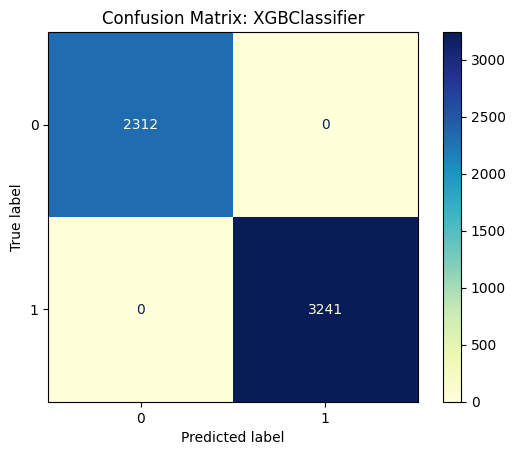

------------------------------------------------------------


In [67]:
for n, model in enumerate(models):
    print(f'models {n + 1}:- {model.__class__.__name__}')
    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    print(f'Training Accuracy: {accuracy_score(y_train, pred_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, pred_test)}')
    print(f'Training Recall: {recall_score(y_train, pred_train)}')
    print(f'Testing Recall: {recall_score(y_test, pred_test)}')
    print(f'Training Precision: {precision_score(y_train, pred_train)}')
    print(f'Testing Precision: {precision_score(y_test, pred_test)}')
    print(f'Training F1score: {f1_score(y_train, pred_train)}')
    print(f'Testing F1score: {f1_score(y_test, pred_test)}')

    cross_validation_scores = cross_val_score(estimator = model,\
                                              X = X_train,\
                                              y = y_train,\
                                              scoring = 'accuracy',\
                                              n_jobs = -1,\
                                              cv = 5
                                              )
    print('Cross Validation Mean: ', cross_validation_scores.mean())
    print()

    cm = confusion_matrix(y_test, pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(cmap = 'YlGnBu', values_format = 'd')
    plt.title(f'Confusion Matrix: {model.__class__.__name__}')
    plt.show()
    print('-' * 60)

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],\
    'max_depth': [None, 10, 20],\
    'min_samples_split': [2, 5, 10],\
    'min_samples_leaf': [1, 2, 4],\
    'max_features': ['sqrt', 'log2']
}

rnd_clf = RandomForestClassifier()
grd_src = RandomizedSearchCV(rnd_clf, param_distributions=rf_param_grid, cv = 3, scoring='accuracy', n_jobs=-1, n_iter=20)
grd_src.fit(X_train, y_train)
grd_src.best_score_

np.float64(1.0)

In [70]:
grd_src.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20}

In [71]:
svc_param_grid = {
    'C': [0.1, 1, 10],\
    'kernel': ['linear', 'rbf', 'poly'],\
    'gamma': ['scale', 'auto'], \
    'degree': [2, 3, 4],
}

svc = SVC()

svc_rscv = RandomizedSearchCV(estimator = svc,\
                              param_distributions = svc_param_grid,\
                              n_iter =  20,\
                              scoring = 'accuracy',\
                              cv = 3,\
                              verbose = 2,\
                              random_state = 42,\
                              n_jobs = -1
                             )

svc_rscv.fit(X_train[:5000], y_train[:5000])

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy', verbose=2)

In [72]:
svc_rscv.best_score_

np.float64(1.0)